In [2]:
import os

# List all files in the /content directory
files = os.listdir('/content')
print(files)

['.config', 'dublin_cleaned.csv', 'nyc_cleaned.csv', '201809-citibike-tripdata.csv', '201811-citibike-tripdata.csv', 'drive', 'dublinbikes_20181001_20190101.csv', '201812-citibike-tripdata.csv', '201810-citibike-tripdata.csv', 'sample_data']


In [3]:
import pandas as pd

# List of file paths
file_paths = [
    '/content/201809-citibike-tripdata.csv',
    '/content/201810-citibike-tripdata.csv',
    '/content/201811-citibike-tripdata.csv',
    '/content/201812-citibike-tripdata.csv'
]

# Reading each CSV file into a DataFrame and store them in a list
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Merging all DataFrames into a single DataFrame
merged_ny = pd.concat(dfs, ignore_index=True)

# Displaying the first few rows of the merged DataFrame
print(merged_ny.head())


   Unnamed: 0  Unnamed: 1  STATION ID               start station name  \
0         NaN         NaN       252.0     MacDougal St & Washington Sq   
1         NaN         NaN       314.0  Cadman Plaza West & Montague St   
2         NaN         NaN      3142.0                  1 Ave & E 62 St   
3         NaN         NaN       308.0          St James Pl & Oliver St   
4         NaN         NaN       345.0                  W 13 St & 6 Ave   

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN         NaN   

   start station id  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  


In [4]:
# File path to the CSV file
file_path = '/content/dublinbikes_20181001_20190101.csv'

# Reading the CSV file into a pandas DataFrame
dub = pd.read_csv(file_path)

# Displaying the first few rows of the DataFrame
print(dub.head())


   STATION ID  Unnamed: 1  Unnamed: 2           NAME
0           1         NaN         NaN  CLARENDON ROW
1           1         NaN         NaN  CLARENDON ROW
2           1         NaN         NaN  CLARENDON ROW
3           1         NaN         NaN  CLARENDON ROW
4           1         NaN         NaN  CLARENDON ROW


In [5]:
# Dropping all unnamed columns
dub_cleaned = dub.loc[:, ~dub.columns.str.contains('^Unnamed')]

# Displaying the first few rows of the cleaned DataFrame
print(dub_cleaned.head())


   STATION ID           NAME
0           1  CLARENDON ROW
1           1  CLARENDON ROW
2           1  CLARENDON ROW
3           1  CLARENDON ROW
4           1  CLARENDON ROW


In [6]:
# Droping all unnamed columns
ny_cleaned = merged_ny.loc[:, ~merged_ny.columns.str.contains('^Unnamed')]
ny_cleaned = ny_cleaned.drop(columns=['start station id'], errors='ignore')
ny_cleaned['STATION ID'] = ny_cleaned['STATION ID'].astype('Int64')

# Displaying the first few rows of the cleaned DataFrame
print(ny_cleaned.head())


   STATION ID               start station name
0         252     MacDougal St & Washington Sq
1         314  Cadman Plaza West & Montague St
2        3142                  1 Ave & E 62 St
3         308          St James Pl & Oliver St
4         345                  W 13 St & 6 Ave


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive statistics
print("Dublin Data Descriptive Statistics:")
print(dub_cleaned.describe())

print("\nNY Data Descriptive Statistics:")
print(ny_cleaned.describe())


Dublin Data Descriptive Statistics:
         STATION ID
count  1.048575e+06
mean   5.807455e+01
std    3.321291e+01
min    1.000000e+00
25%    3.000000e+01
50%    5.800000e+01
75%    8.700000e+01
max    1.150000e+02

NY Data Descriptive Statistics:
        STATION ID
count    1048113.0
mean   1649.379321
std    1455.025266
min           72.0
25%          382.0
50%          514.0
75%         3263.0
max         3705.0


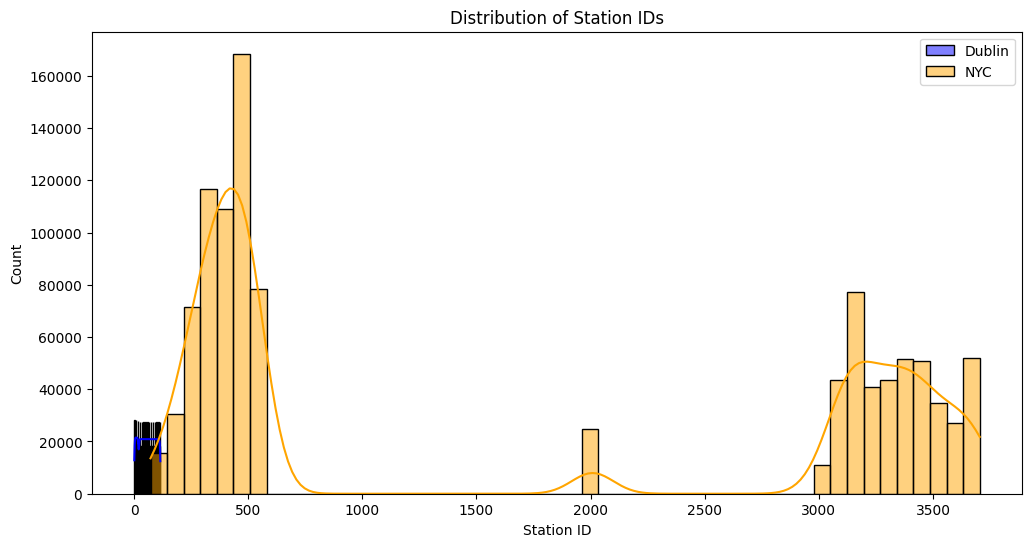

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of station IDs in both datasets
plt.figure(figsize=(12, 6))
sns.histplot(dub_cleaned['STATION ID'], bins=50, kde=True, color='blue', label='Dublin')
sns.histplot(ny_cleaned['STATION ID'], bins=50, kde=True, color='orange', label='NYC')
plt.title('Distribution of Station IDs')
plt.xlabel('Station ID')
plt.legend()
plt.show()


In [9]:
# Checking for missing values in the Dublin dataset
print("Missing values in Dublin dataset:")
print(dub_cleaned.isnull().sum())

# Checking for missing values in the NYC dataset
print("Missing values in NYC dataset:")
print(ny_cleaned.isnull().sum())


Missing values in Dublin dataset:
STATION ID    0
NAME          0
dtype: int64
Missing values in NYC dataset:
STATION ID            3114117
start station name        769
dtype: int64


In [10]:
ny_cleaned = ny_cleaned.dropna(subset=['STATION ID'])
dub_cleaned = dub_cleaned.dropna(subset=['STATION ID'])

In [11]:
dub_cleaned['STATION ID'] = dub_cleaned['STATION ID'].astype(int)
ny_cleaned['STATION ID'] = ny_cleaned['STATION ID'].astype(int)

<ipython-input-11-79d23075bd22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ny_cleaned['STATION ID'] = ny_cleaned['STATION ID'].astype(int)


In [12]:
import scipy.stats as stats

# Calculating confidence interval for mean station ID for Dublin
mean_dub = dub_cleaned['STATION ID'].mean()
sem_dub = stats.sem(dub_cleaned['STATION ID'])
ci_dub = stats.t.interval(0.95, len(dub_cleaned['STATION ID'])-1, loc=mean_dub, scale=sem_dub)

print(f"Dublin Station ID 95% Confidence Interval: {ci_dub}")

# Calculating confidence interval for mean station ID for NYC
mean_ny = ny_cleaned['STATION ID'].mean()
sem_ny = stats.sem(ny_cleaned['STATION ID'])
ci_ny = stats.t.interval(0.95, len(ny_cleaned['STATION ID'])-1, loc=mean_ny, scale=sem_ny)

print(f"NYC Station ID 95% Confidence Interval: {ci_ny}")


Dublin Station ID 95% Confidence Interval: (58.01097731224191, 58.13811836522513)
NYC Station ID 95% Confidence Interval: (1646.5937443471357, 1652.1648971352233)


In [13]:
# Perform t-test for mean station ID between Dublin and NYC
t_stat, p_value = stats.ttest_ind(dub_cleaned['STATION ID'], ny_cleaned['STATION ID'], equal_var=False)

print(f"T-Test for Mean Station ID: T-Statistic = {t_stat}, P-Value = {p_value}")


T-Test for Mean Station ID: T-Statistic = -1119.3704063118698, P-Value = 0.0


In [14]:
# Performing Wilcoxon test for station ID between Dublin and NYC
w_stat, p_value = stats.ranksums(dub_cleaned['STATION ID'], ny_cleaned['STATION ID'])

print(f"Wilcoxon Test for Station ID: W-Statistic = {w_stat}, P-Value = {p_value}")


Wilcoxon Test for Station ID: W-Statistic = -1249.6480761443156, P-Value = 0.0


In [15]:
# Creating a contingency table for station ID counts
dublin_station_counts = dub_cleaned['STATION ID'].value_counts()
ny_station_counts = ny_cleaned['STATION ID'].value_counts()

# Aligning the indices
combined_station_counts = pd.concat([dublin_station_counts, ny_station_counts], axis=1).fillna(0)
combined_station_counts.columns = ['Dublin', 'NYC']

# Performing chi-squared test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(combined_station_counts)

print(f"Chi-Squared Test for Station ID Distribution: Chi2 Statistic = {chi2_stat}, P-Value = {p_val}")


Chi-Squared Test for Station ID Distribution: Chi2 Statistic = 2078286.161111374, P-Value = 0.0


In [16]:
# Performing Mann-Whitney U test for station ID between Dublin and NYC
u_stat, p_value = stats.mannwhitneyu(dub_cleaned['STATION ID'], ny_cleaned['STATION ID'])

print(f"Mann-Whitney U Test for Station ID: U-Statistic = {u_stat}, P-Value = {p_value}")


Mann-Whitney U Test for Station ID: U-Statistic = 1906902969.0, P-Value = 0.0


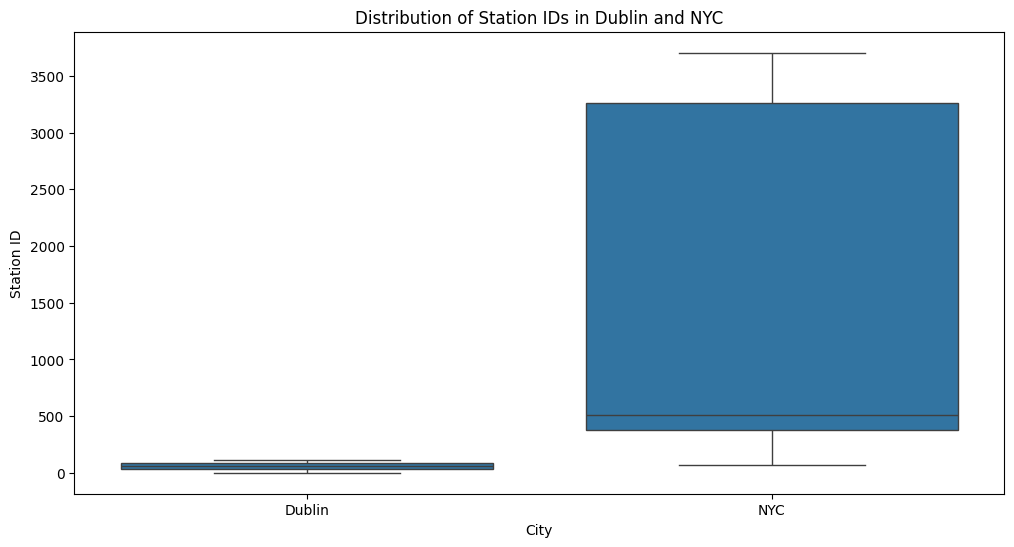

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combining the datasets for visualization
dub_cleaned['City'] = 'Dublin'
ny_cleaned['City'] = 'NYC'
combined_data = pd.concat([dub_cleaned[['STATION ID', 'City']], ny_cleaned[['STATION ID', 'City']]])

# Box plot of station IDs
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='STATION ID', data=combined_data)
plt.title('Distribution of Station IDs in Dublin and NYC')
plt.xlabel('City')
plt.ylabel('Station ID')
plt.show()


ML part

In [29]:
!pip install praw
!pip install textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.2 MB/s eta 0:00:00


In [31]:
import praw

#  Reddit API credentials
client_id = '***'
client_secret = '***'
user_agent = '***'

# Authentication with the Reddit API
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=user_agent)


In [32]:
# Defining the subreddit and search query
subreddit = reddit.subreddit('dublin')
query = 'bicycle OR bike OR cycling'

# Searching for posts in the subreddit
posts = []
for submission in subreddit.search(query, limit=100):
    posts.append([submission.created_utc, submission.title, submission.selftext])

# Creating a DataFrame
df = pd.DataFrame(posts, columns=['Timestamp', 'Title', 'Text'])

# Displaying the first few rows of the DataFrame
print(df.head())

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



      Timestamp                                              Title  \
0  1.715253e+09                               Full bicycle service   
1  1.626219e+09  Bicycle stolen from girl in Fairview - please ...   
2  1.716926e+09     How to stop being afraid of cycling in Dublin?   
3  1.722697e+09            Using bicycle when going for groceries.   
4  1.647850e+09                                  Cycling in Dublin   

                                                Text  
0  Can anyone recommend a reliable place to get a...  
1                                                     
2  As the title says. I enjoy cycling a lot but w...  
3  Hello I am new to Dublin, Ireland. Does anyone...  
4  Due to the fuel prices skyrocketing and conven...  


      Timestamp                                              Title  \
0  1.715253e+09                               Full bicycle service   
1  1.626219e+09  Bicycle stolen from girl in Fairview - please ...   
2  1.716926e+09     How to stop being afraid of cycling in Dublin?   
3  1.722697e+09            Using bicycle when going for groceries.   
4  1.647850e+09                                  Cycling in Dublin   

                                                Text  \
0  Can anyone recommend a reliable place to get a...   
1                                                      
2  As the title says. I enjoy cycling a lot but w...   
3  Hello I am new to Dublin, Ireland. Does anyone...   
4  Due to the fuel prices skyrocketing and conven...   

                                             Content  Polarity Sentiment  
0  Full bicycle service Can anyone recommend a re...  0.132500  Positive  
1  Bicycle stolen from girl in Fairview - please ...  0.000000   Neutral  
2  How to stop be

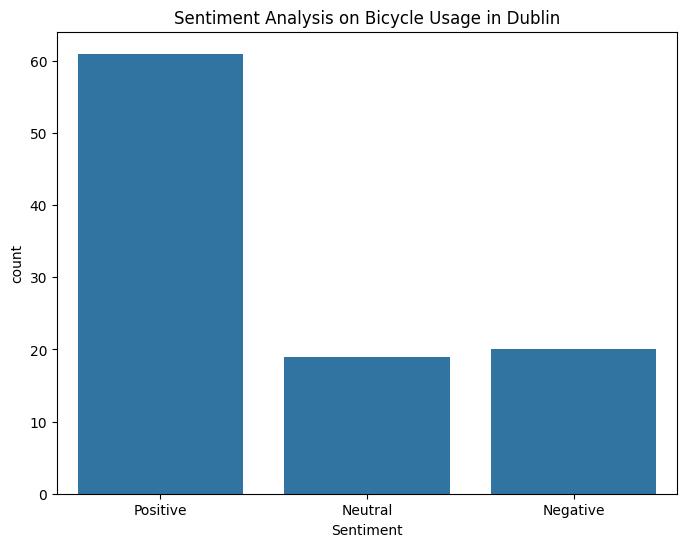

In [33]:
from textblob import TextBlob

# Function to get the polarity
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to get the sentiment
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Combining the title and text for sentiment analysis
df['Content'] = df['Title'] + " " + df['Text']

# Applying the functions to the DataFrame
df['Polarity'] = df['Content'].apply(get_polarity)
df['Sentiment'] = df['Polarity'].apply(get_sentiment)

# Displaying the DataFrame with Sentiment
print(df.head())

# Visualizing the results
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Analysis on Bicycle Usage in Dublin')
plt.show()


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



# Data Preparation
df['Content'] = df['Title'] + " " + df['Text']
X = df['Content']
y = df['Sentiment']

# Converting text data into numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Training a Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

# Evaluating the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         2
    Positive       0.85      1.00      0.92        17

    accuracy                           0.85        20
   macro avg       0.28      0.33      0.31        20
weighted avg       0.72      0.85      0.78        20

Accuracy: 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
